## Keşifçi Veri Analizi | Becerileri Pekiştirme

## Kütüphaneleri Çağırma

Aşağıda ihtiyacımız doğrultusunda kullanacağımız kütüphaneleri yükleyelim.

Öncelikle pandas, numpy ve seaborn kütüphanelerini çağırarak başlıyoruz.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

Görünen uyarı mesajlarını filtrelemek için aşağıdaki kod parçasını kullanıyorum. Bu sayede, kodun okunabilirliği artacak ve gereksiz uyarılar ekrana yazdırılmayacak.

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Veri Setini Çağırma ve Veri Setine Genel Bakış

Veri çerçevemizi bulunduğumuz dizinden yükleyelim ve bir veri çerçevesi haline getirerek df değişkenine atayalım. (pd.read_csv(...csv))

In [3]:
df_iris = pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")

Veri çerçevesinin ilk 5 gözlemini görüntüleyelim.

In [4]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Veriseti incelendiğinde İris(Süsen) çiçeğinin yaprak uzunluk ve genişliği bilgilerinin yer aldığı görülmekte. Her bir satır, bir çiçeğe ait ölçüm değerlerini gösterir.

Özellikler sırasıyla sepal-length (alt yaprak uzunluğu cm), sepal-with (alt yaprak genişliği cm), pedal-length (üst yaprak genişliği), pedal-width (üst yaprak uzunluğu).

Son sütunda da görüleceği üzere sınıflarımız ise setosa, versicolor ve virginica.

Veri çerçevesinin kaç öznitelik ve kaç gözlemden oluştuğunu görüntüleyelim.

In [5]:
df_iris.shape

(150, 5)

Buradan da anlaşılabileceği gibi iris verisetimiz 150 satır(gözlem) 5 sütundan(öznitelik) oluşmaktadır.

"shape" fonksiyonunun yanı sıra “columns” ve “dtypes” fonksiyonları ile set hakkında daha fazla bilgiye ulaşabiliriz.

In [6]:
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
df_iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

sepal_length sepal_width petal_length ve petal_width değerlerinin "float64" ile ifade edildiği görülmekte. Yani nümerik ifadeler.

Fakat species değerleri object veri türünde. Yani kategorik değişken.

Veri çerçevesindeki değişkenlerin hangi tipte olduğunu ve bellek kullanımını görüntüleyelim.

Ayrıca Pandas’ta bu üç bilginin hepsini hatta daha fazlasını içeren “info” fonksiyonu mevcut.

 Veri çerçevesindeki değişkenlerin türlerini ve bellek kullanımını info() metodu ile görüntüleyebiliriz.

In [8]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


İnceleme sonucunda 5 ayrı sütun,150 satırdan oluşan bir verisetiyle beraberiz. Sütun isimleri _'sepal_length', 'sepal_width', 'petal_length', 'petal_width','species'_. Ve her bir sütunun dtype'ı listelenmiş durumda. 

Verimizin hiçbir satırında **NULL** değer bulunmadığı da görülüyor. Ancak, verilerin cm cinsinden uzunluk olması gerektiği düşünüldüğünde, 0 cm veya negatif değerlerin girilmiş olması durumunda, burada eksik verilerin bulunabileceğini söyleyebiliriz. Veriseti incelerken bu durumları da göz önünde bulundurmamız gerekiyor. **NULL** değer bulunmadı diyerek incelemeye devam etmemeliyiz. Aykırı değerlere göz atarak kafamızdaki bu soru işaretlerini silebiliriz.



Veri çerçevesindeki sayısal değişkenler için temel istatistik değerlerini görüntüleyelim.

Standart sapma ve ortalama değerlerden çıkarımda bulunarak hangi değişkenlerin ne kadar varyansa sahip olduğu hakkında fikir yürütelim.

Bunun için describe fonksiyonunu kullanacağım.

Describe() fonksiyonu, veri çerçevesindeki sayısal değişkenlerin temel istatistiksel özelliklerini gösteren bir özet istatistikleri tablosu oluşturur. Bu özellikler, değişkenlerin ortalaması, standart sapması, minimum ve maksimum değerleri, çeyreklik değerleri ve gözlem sayısıdır.

In [9]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


1. Sepal uzunluğu (sepal_length) için ortalama değer 5.84 ve standart sapması 0.83'tür.
2. Sepal genişliği (sepal_width) için ortalama değer 3.05 ve standart sapması 0.43'tür.
3. Petal uzunluğu (petal_length) için ortalama değer 3.76 ve standart sapması 1.76'dır.
4. Petal genişliği (petal_width) için ortalama değer 1.19 ve standart sapması 0.76'dır.


Ortalama ve standart sapma, bir değişkenin varyansı hakkında fikir verir. Standart sapma, ortalama etrafında verilerin ne kadar yayıldığını gösterir. Örneğin, petal uzunluğu değişkeni için standart sapma 1.76'dür, bu da verilerin ortalama etrafında oldukça yayıldığını ve yüksek bir varyansa sahip olduğunu gösterirken, sepal genişliği değişkeni için standart sapma 0.43'tür ve verilerin daha az yayıldığını ve daha düşük bir varyansa sahip olduğunun bir göstergesidir.

## Eksik Veri Kontrolü

Veri çerçevesinde hangi öznitelikte kaç adet eksik değer olduğunu gözlemleyelim.

Gözlemlendiği üzere de her satırda 150 tane boş olmayan satır bulunmakta. Bu da demek oluyor ki verimizde eksik değer yok. Bunun sağlamasını da **isnull() ve sum()** fonksiyonları yardımıyıyla görebiliriz.

In [10]:
df_iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Veri Görselleştirme

### Korelasyon

Sayısal değişkenler arasında korelasyon olup olmadığını göstermek için korelasyon matrisi çizdirelim. Korelasyon katsayıları hakkında fikir yürütelim.

En güçlü pozitif ilişki hangi iki değişken arasındadır?

Korelasyon değişkenlerimiz arasındaki oran diyebiliriz. Oranlar -1 ve 1 arasında çıkar. -1 negatif ilişki , 1 pozitif ilişki ,0 ilişki yok demektir. İlişki 1e ne kadar yakınsa ilişki o kadar çoktur diyebiliriz.  

Korelasyonu bulmak için corr() fonksiyonunu kullanıyorum.


Korelasyon matrisindeki her bir değişken kendisiyle olan korelasyonu 1'dir çünkü bir değişkenin kendisiyle arasındaki ilişki tam olarak pozitiftir ve korelasyon katsayısı 1'dir. Diğer değişkenlerle arasındaki korelasyon ise farklı olabilir. Örneğin, sepal_width'in de petal_length'in de değişkenleri arasındaki korelasyon katsayısı 1'dir, **çünkü her bir değişken kendisiyle olan korelasyonu 1'dir.** Dolayısıyla, korelasyon matrisinde köşegen her zaman 1'dir, çünkü bir değişkenin kendisiyle olan korelasyonu **her zaman mükemmeldir.**

In [11]:
df_iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


Korelasyon matrisine baktığımızda, en güçlü pozitif ilişki "petal_length" ve "petal_width" arasında görülür. Tablo incelendiğinde bu oranın 0.962757 olduğu gözükmekte. Yani 1'e oldukça yakın. Bu da, çiçeklerin taç yapraklarının uzunluğu arttıkça, taç yapraklarının genişliğinin de arttığını gösterir.

Ayrıca, "sepal_length" ve "petal_length" arasında da 0.871754 ile pozitif bir ilişki vardır, ancak "petal_length" ve "petal_width" arasındaki ilişki (0.96) daha güçlüdür.

Bununla birlikte, "sepal_length" ve "sepal_width" arasında neredeyse hiç ilişki yoktur (-0.109). Yani bitkinin çanak yaprağının boyuyla genişliğinin ilişkisi oldukça düşüktür.

Bizim daha fazla değişkenimiz varken neden burada 4 değişken gözüküyor?

Çünkü korelasyon __kategorik__ değişkenlerde hesaplanamaz.

Peki bu veri setindeki kategorik değişkenler ne? Bunu gözlemlemek için tekrardan veri setini çağıralım

In [12]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Görüldüğü üzere "species" değişkeni kategorik değişken ve bu yüzden korelasyon grafiğinde yer almadı.

Korelasyonda da hesaplayabilmek için __kategorik değerler değil nümerik değer__ olmalıdır.Korelasyonda yalnızca nümerik değerleri inceleyebiliriz.

Korelasyon katsayılarını daha iyi okuyabilmek için ısı haritası çizdirelim.

Isı haritasını çizebilmek için matplotlib kütüphanesini tanımlamamız gerekiyor. plt kısaltmasıyla matplotlib kütüphanesini import ediyorum.

In [13]:
import matplotlib.pyplot as plt

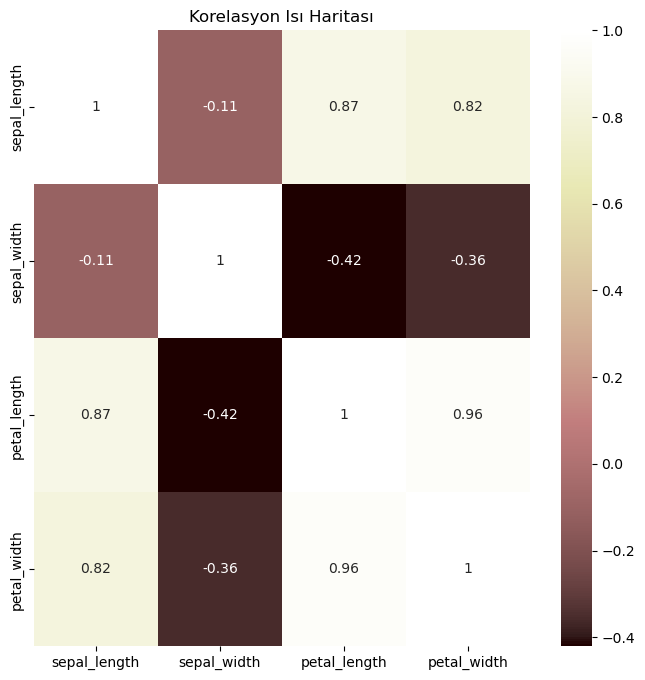

In [14]:
plt.figure(figsize = (8,8))
plt.title("Korelasyon Isı Haritası");
sns.heatmap(df_iris.corr() , cmap="pink" , annot=True);

Renk skalasına göre; renk tonu açık olduğunda, değişkenler arasındaki ilişki o kadar yüksektir. Harita incelendiğinde, tekrardan en güçlü ilişkinin (1'den sonra) 0.96 ile "petal_length" ve "petal_width" arasında olduğu görülmektedir.

Veri çerçevemizin hedef değişkeninin "variety" benzersiz değerlerini görüntüleyelim.

In [15]:
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [16]:
print(df_iris["species"].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Veri çerçevemizin hedef değişkeninin "variety" benzersiz kaç adet değer içerdiğini görüntüleyelim.

Bunun için Pandas kütüphanesinin "nunique()" fonksiyonu ile veri çerçevesinin belirtilen sütununun benzersiz değerlerinin sayısı bulunabilir.

Görüldüğü üzere 3 adet benzersiz değişken bulunuyor.

In [17]:
print(df_iris['species'].nunique() , "adet benzersiz değişkeni vardır.")

3 adet benzersiz değişkeni vardır.


Veri çerçevesindeki sepal.width ve sepal.length değişkenlerinin sürekli olduğunu görüyoruz. Bu iki sürekli veriyi görselleştirmek için önce scatterplot kullanalım.

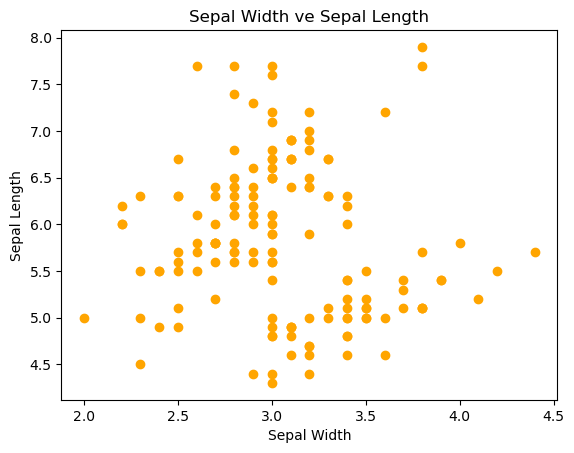

In [18]:
plt.title("Sepal Width ve Sepal Length")
plt.scatter(x=df_iris["sepal_width"], y=df_iris["sepal_length"] , color="orange")
plt.xlabel("Sepal Width")
plt.ylabel("Sepal Length")
plt.show()

Sepal Width değişkeninin değerleri 2.5-3.5 aralığında yoğun olarak gözükmektedir. Length değişkeninin değerleri ise 5.5-7.0 arasında yoğunlaşmaktadır diyebiliriz.

Aynı iki veriyi daha farklı bir açıdan frekanslarıyla incelemek için jointplot kullanarak görselleştirelim. 

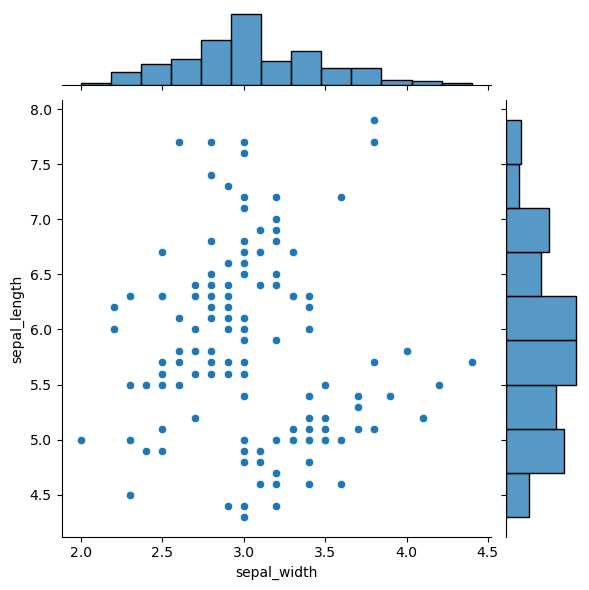

In [19]:
sns.jointplot(x="sepal_width" , y="sepal_length" , kind="scatter", data=df_iris);

Bu grafiğe bakarak bir önceki yorumumun kısmen doğru olduğunu görüyorum. Çünkü ilk grafikte length'in değerlerinin 4.5-5.0 arasında yoğunlaştığını görememiştim. jointplot grafiği yorum yapmak için daha mantıklı bir grafik. 

Aynı iki veriyi scatterplot ile tekrardan görselleştirelim fakat bu sefer "variety" parametresi ile hedef değişkenine göre kırdıralım. 

3 farklı renk arasında sepal değişkenleriyle bir kümeleme yapılabilir mi? Ne kadar ayırt edilebilir bunun üzerine düşünelim.

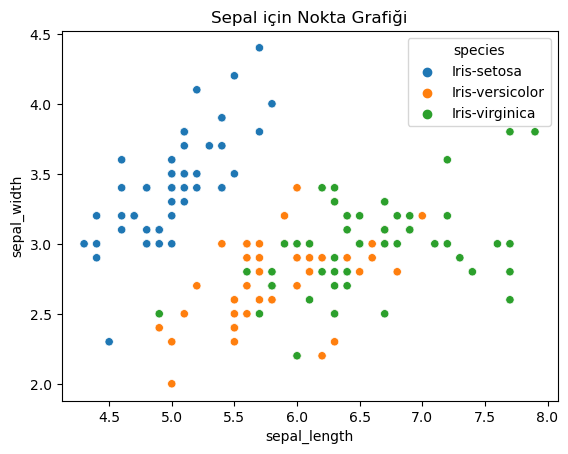

In [20]:
sns.scatterplot(x="sepal_length", y="sepal_width", hue="species", data=df_iris);
plt.title("Sepal için Nokta Grafiği");
plt.show()

Grafikte 3 farklı renk arasında sepal değişkenleriyle bir kümeleme yapılabildiği görülmektedir. Görüldüğü üzere lacivert renkli "Setosa" türü diğerlerinden daha iyi ayrılmaktadır, ancak turuncu renkli "Versicolor" ve  yeşil renkl,"Virginica" türleri birbirine daha çok benzemektedir. Daha çok iç içe geçmiş durumdadır. Bu nedenle, sadece sepal özellikleri kullanarak türleri kesin olarak ayırt etmek zordur. Başka özellikleri de analize dahil ederek yorumlamamız gerekir.

Mesela scatterplot fonksiyonu ile "petal_length" ve "petal_width" değişkenini incelersek durum nasıl olur?

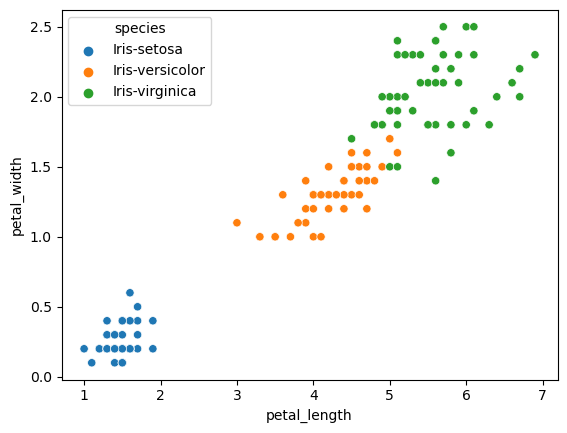

In [21]:
sns.scatterplot(x="petal_length", y="petal_width", hue="species", data=df_iris);

Bu scatterplot grafiği, petal uzunluğu (x ekseni) ve petal genişliği (y ekseni) değişkenlerinin çiçek türüne (setosa, versicolor ve virginica) göre dağılımını gösterir. Her tür farklı bir renk ile temsil edilir. Görselden, virginica çiçeğinin genellikle diğer iki türden daha büyük petallere sahip olduğu ve versicolor ve setosa'nın birbirine benzer boyutlara sahip oldukları görülebilir. Ayrıca, setosa çiçeği ile diğer iki tür arasında net bir ayrım gözlemlenebilir.

Yani anlaşılacağı üzere Setosa çiçeği gerek petal gerek ise sepal olarak diğer iki çiçek türünden ayrışıyor.

value_counts() fonksiyonu ile veri çerçevemizin ne kadar dengeli dağıldığını sorgulayalım. 

In [22]:
df_iris["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

species değişkenindeki her bir sınıfın veri çerçevesinde kaç kez tekrarlandığını sayar ve sonuçları sınıf adıyla birlikte gösterir. Görüldüğü üzere her çeşitten 50 adet bulunuyor. Bu da demek oluyor ki verisetimiz dengeli dağılmış.

Eğer her sınıftan farklı sayıda örnek olsaydı, bu dengesiz bir dağılım olarak yorumlanabilirdi.

Keman grafiği çizdirerek sepal.width değişkeninin dağılımını inceleyin. 

Söz konusu dağılım bizim için ne ifade ediyor, normal bir dağılım olduğunu söyleyebilir miyiz?

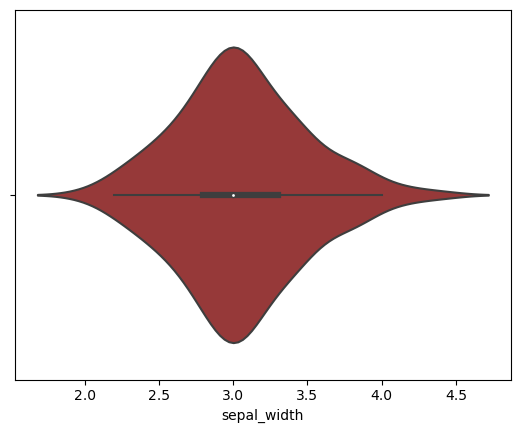

In [23]:
sns.violinplot(x="sepal_width", data=df_iris , color="brown");

Keman grafiği, veri dağılımının yoğunluk eğrisini gösteren ve aynı zamanda veri dağılımının simetrik mi yoksa çarpık mı olduğunu gösteren bir görselleştirme aracıdır.

Sepal.width değişkeninin keman grafiğine bakarak, verinin normal bir dağılım göstermediği, hafif bir çarpıklık olduğu söylenebilir. Grafiğin sol tarafındaki kuyruk daha uzun ve çıkıntılıdır. Bu nedenle, sepal.width değişkeninin normal bir dağılım göstermediğini söyleyebiliriz.

 Grafiğin merkezindeki beyaz nokta, değişkenin ortalamasını gösterirken, çizginin uzunluğu, değişkenin dağılımını ifade eder. Burada sepal_width değişkeninin yoğunluklu olarak 2.5 ile 3.5 arasında dağıldığı ve geniş bir dağılıma sahip olduğu görülmektedir. Ayrıca, birkaç aykırı değer de görülmektedir.

Daha iyi anlayabilmek için sepal.width üzerine bir distplot çizdirelim.

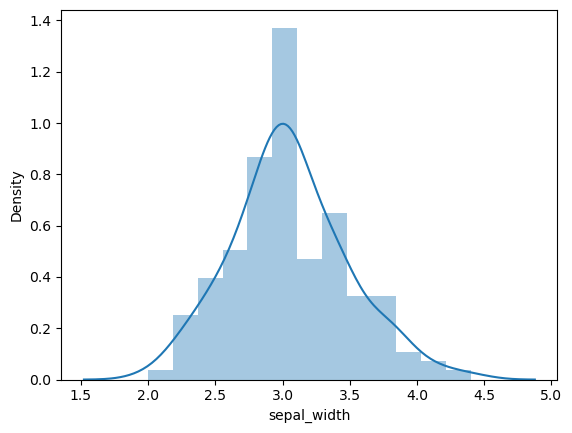

In [24]:
sns.distplot(df_iris['sepal_width']);

Histogram, verilerin frekans dağılımını belirlerken, çizgi grafiği verilerin yoğunluğunu gösterir. Bu grafikte, sepal_width sütunundaki verilerin normal dağılıma yakın bir dağılım gösterdiği, ancak bazı aykırı değerlerin de olduğu görülebilir.

Üç çiçek türü için üç farklı keman grafiğini sepal.length değişkeninin dağılımı üzerine tek bir satır ile görselleştirelim.

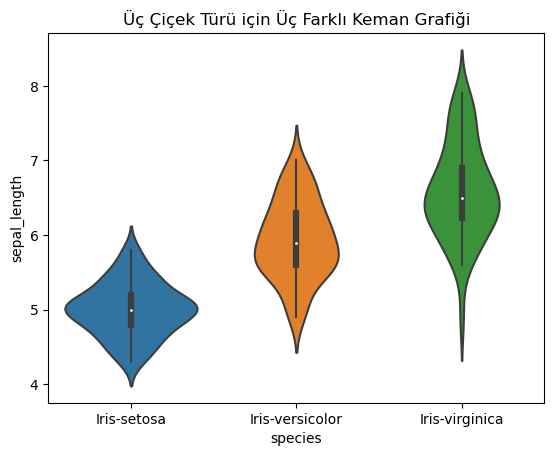

In [25]:
sns.violinplot(x="species" , y="sepal_length", data  = df_iris );
plt.title("Üç Çiçek Türü için Üç Farklı Keman Grafiği")
plt.show()

Yukarıdaki keman grafiği gösteriyor ki Setosa çiçeklerinin sepal length değerleri birbirine daha yakın bir dağılım gösterirken, Virginica çiçeklerinin sepal length değerleri daha geniş bir aralıkta dağılıyor ve bu nedenle daha fazla değişkenlik gösteriyor.

Hangi çiçek türünden kaçar adet gözlem barındırıyor veri çerçevemiz?

50 x 3 olduğunu ve **dengeli** olduğunu value_counts ile zaten görmüştük, ancak bunu görsel olarak ifade etmek için sns.countplot() fonksiyonuna variety parametresini vereilm.

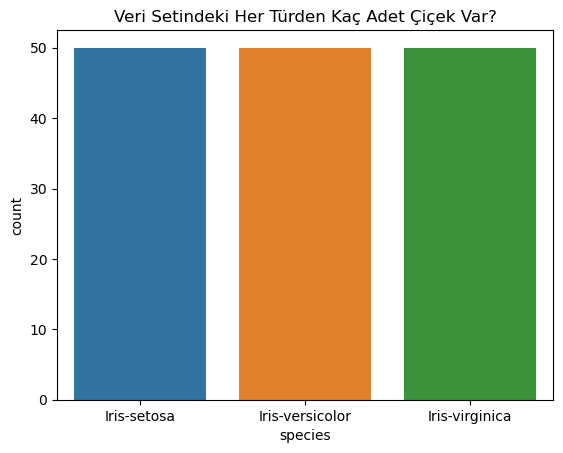

In [26]:
sns.countplot(x="species", data=df_iris)
plt.title("Veri Setindeki Her Türden Kaç Adet Çiçek Var?")
plt.show()

sepal.length ve sepal.width değişkenlerini sns.jointplot ile görselleştirelim, dağılımı ve dağılımın frekansı yüksek olduğu bölgelerini inceleyelim.

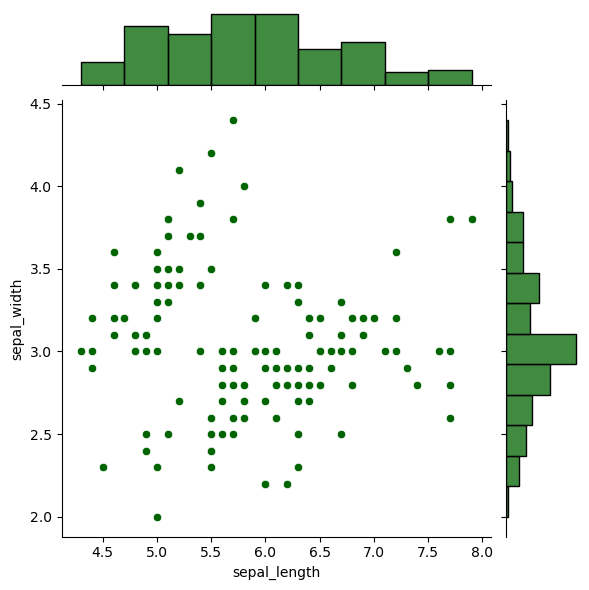

In [27]:
sns.jointplot(data=df_iris, x="sepal_length", y="sepal_width" , color="darkgreen")
plt.show()

Bir önceki hücrede yapmış olduğumuz görselleştirmeye kind = "kde" parametresini ekleyelim. Böylelikle dağılımın noktalı gösterimden çıkıp yoğunluk odaklı bir görselleştirmeye dönüştüğünü görmüş olacağız.

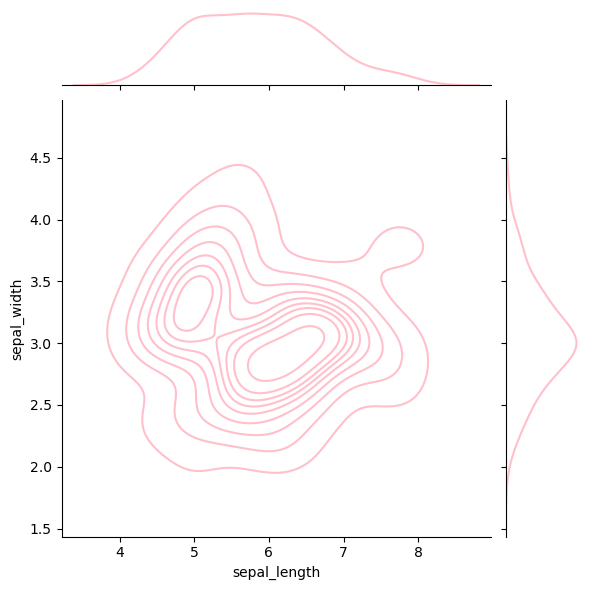

In [28]:
sns.jointplot(data=df_iris, x="sepal_length", y="sepal_width" , kind="kde" , color="pink")
plt.show()

Dağılımın hangi bölgelerde daha sık olduğunu görmek için **kind=kde** seçeneğini kullandım. Bu seçenek grafikte yoğunluğu temsil eden bir çizgi ekler.

scatterplot ile petal.length ve petal.width değişkenlerinin dağılımlarını çizdirelim.

Aşağıdaki kod parçası, "petal_length" değişkeninin x-ekseninde, "petal_width" değişkeninin y-ekseninde olduğu bir scatterplot oluşturur.

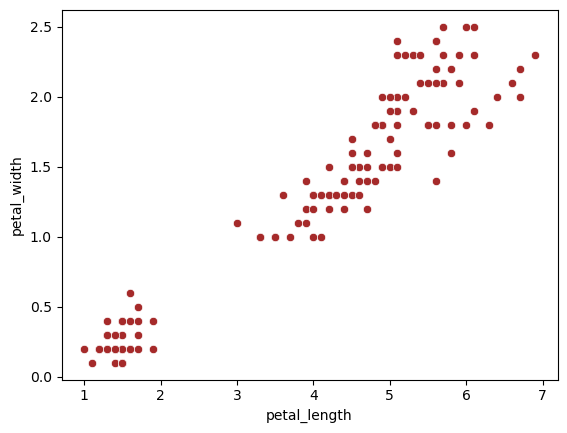

In [29]:
sns.scatterplot(x="petal_length", y="petal_width",color="brown" , data=df_iris);

Aynı görselleştirmeye hue = "variety" parametresini ekleyerek 3. bir boyut verelim.

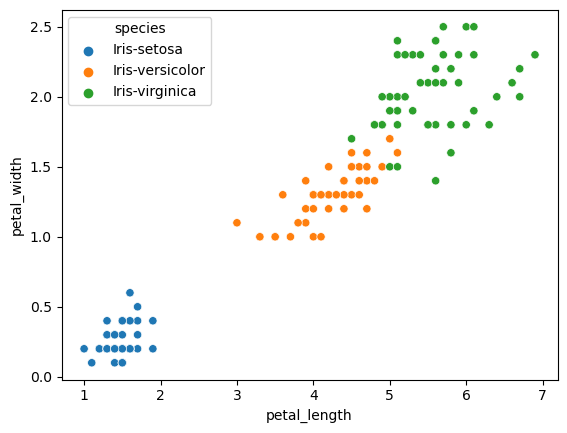

In [30]:
sns.scatterplot(x="petal_length", y="petal_width", hue="species" ,data=df_iris);


Bu grafiğe göre; setosa türü diğer iki türe göre daha küçük boyutlu ve daha dar yapraklara sahiptir çıkarımında bulunabiliriz.

sns.lmplot() görselleştirmesini petal.length ve petal.width değişkenleriyle implemente edelim. Petal length ile petal width arasında ne tür bir ilişki var ve bu ilişki güçlü müdür? sorusunu yanıtlayalım.

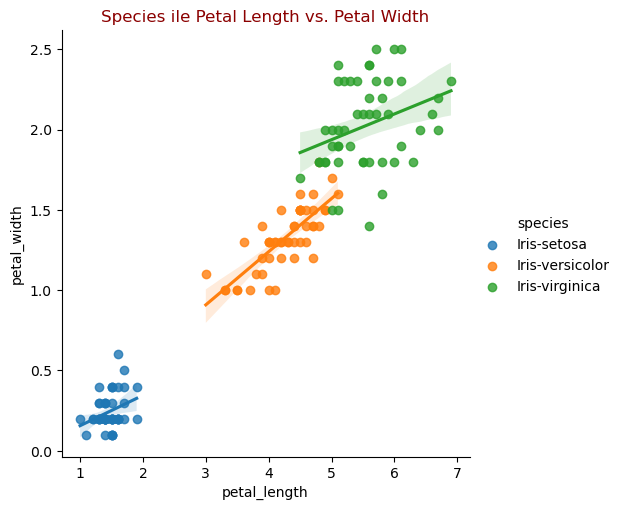

In [31]:
sns.lmplot(x="petal_length", y="petal_width", hue="species", data=df_iris);
plt.title("Species ile Petal Length vs. Petal Width" , color="darkred")
plt.show()

Bu görselleştirmede, petal length ile petal width arasında pozitif bir ilişki olduğu görülmektedir. Yani bir çiçeğin petal length değeri arttıkça, petal width değeri de genellikle artmaktadır. Ayrıca, her bir çiçek türü için (setosa, versicolor ve virginica), bu ilişkinin farklı bir doğru üzerinde olduğu görülmektedir.

Özellikle setosa çiçeklerinin (lacivert renkli noktalar) petal length ve petal width değerleri arasındaki ilişki, diğer iki çiçek türüne göre daha zayıf görünmektedir. Bunun nedeni, setosa çiçeklerinin diğer çiçek türlerine göre daha küçük boyutlara sahip olması olabilir.Tabii ki bu çıkarım kesinlikle doğrudur demek yanlış olur. Diğer durumlarla birlikte daha detaylı incelenmesi gerekir.

Grafikteki çizginin oldukça dik olması, bu değişkenler arasındaki ilişkinin yüksek korelasyonlu olduğunu göstermektedir. Grafikte, özellikle Versicolor çiçeklerinin (turuncu renkli noktalar) arasındaki ilişki en yüksek korelasyonlu olanıdır. 

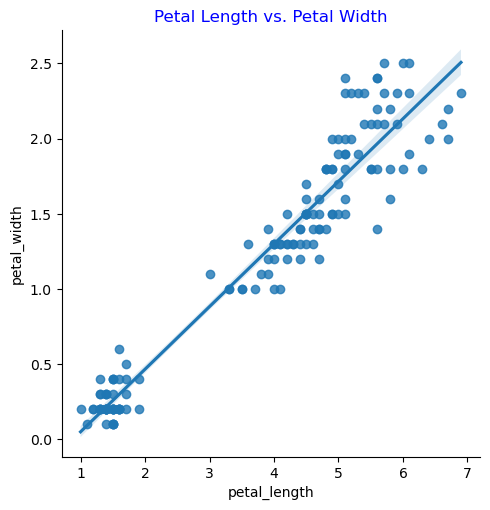

In [32]:
sns.lmplot(x="petal_length", y="petal_width", data=df_iris );
plt.title("Petal Length vs. Petal Width" , color="blue")
plt.show()

Grafiği çiçek türlerine göre sınıflandırmadan tek bir şekilde de gösterebiliriz.

Bu grafiğe bakarak da petal uzunluğu ve genişliği arasında pozitif bir ilişki olduğunu görebiliyoruz. Veri noktaları çizgiye yakın bir şekilde gruplanmıştır, bu da yüksek bir korelasyon olduğunu göstermektedir. Species değişkenine göre sınıflandırmadan tek tip olarak gösterilmesi, tüm çiçek türleri arasındaki ilişkiyi daha net bir şekilde görmemizi sağlar.

Bu sorunun yanıtını pekiştirmek için iki değişken arasında korelasyon katsayısını yazdıralım. 

In [33]:
petal_corr = df_iris['petal_length'].corr(df_iris['petal_width']);
petal_corr

0.9627570970509663

Daha önceden de hatırlarsınız ki en büyük korelasyon 0.96 ile petal_length ile petal_width arasındaydı. petal_corr değişkenini de hesaplayıp tekrar ekrana yazdırdığımızda bunu görebiliyoruz.

Bu sonuç, yüksek bir pozitif ilişki olduğunu ve iki değişkenin birlikte arttığını gösterir. Ayrıca bu sonuç, daha önce yapılan görselleştirme analizinde de görüldüğü üzere, petal length ve petal width arasındaki ilişkinin güçlü olduğunu doğrulamaktadır.

Petal Length ile Sepal Length değerlerini toplayarak yeni bir total length özniteliği oluşturalım.

In [34]:
df_iris.assign(total_length = df_iris['petal_length'] + df_iris['sepal_length'])


,sepal_length,sepal_width,petal_length,petal_width,species,total_length
0,5.1,3.5,1.4,0.2,Iris-setosa,6.5
1,4.9,3.0,1.4,0.2,Iris-setosa,6.3
2,4.7,3.2,1.3,0.2,Iris-setosa,6.0
3,4.6,3.1,1.5,0.2,Iris-setosa,6.1
4,5.0,3.6,1.4,0.2,Iris-setosa,6.4
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,11.9
146,6.3,2.5,5.0,1.9,Iris-virginica,11.3
147,6.5,3.0,5.2,2.0,Iris-virginica,11.7
148,6.2,3.4,5.4,2.3,Iris-virginica,11.6


total_length değişkenini oluşturduk ve tabloya ekledik fakat tabloya kalıcı olarak eklemedik. df_iris yapısını yukarıdaki kod satırına eşitlersek kalıcı olarak total_length değişkenini tabloya eklemiş oluruz.

In [35]:
df_iris = df_iris.assign(total_length = df_iris['petal_length'] + df_iris['sepal_length']);
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species,total_length
0,5.1,3.5,1.4,0.2,Iris-setosa,6.5
1,4.9,3.0,1.4,0.2,Iris-setosa,6.3
2,4.7,3.2,1.3,0.2,Iris-setosa,6.0
3,4.6,3.1,1.5,0.2,Iris-setosa,6.1
4,5.0,3.6,1.4,0.2,Iris-setosa,6.4
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,11.9
146,6.3,2.5,5.0,1.9,Iris-virginica,11.3
147,6.5,3.0,5.2,2.0,Iris-virginica,11.7
148,6.2,3.4,5.4,2.3,Iris-virginica,11.6


total.length'in ortalama değerini yazdıralım. 

Bir değişkenin ortalamasını bulabilmek için mean() fonksiyonu kullanılır.

Tüm çiçek türlerinin uzunlukları toplamının, gözlem sayısına bölünmesi sonucunda ortalama uzunluk 9.6 olarak bulunmuştur.

In [36]:
total_length_mean= df_iris["total_length"].mean()
print("Ortalama Değer: ", total_length_mean)

Ortalama Değer:  9.602


total.length'in standart sapma değerini yazdıralım.

Standart sapma ise 2.5 çıktı.

In [37]:
total_length_std= df_iris["total_length"].std()
print("Standart Sapma: ", total_length_std)

Standart Sapma:  2.5191739884121973


Ortalama 9.6, total_length değişkeninin tüm örneklem verilerinin toplamının örneklem sayısına bölünmesiyle hesaplanan bir değerdir. Bu da tüm çiçeklerin ortalama uzunluğunu verir. Standart sapma ise verilerin ne kadar yayıldığını gösteren bir ölçüttür. Bu durumda, standart sapmanın 2.5 olması, tüm çiçeklerin uzunluklarının ortalamadan ne kadar **farklılaştığını** gösterir. Yani, çiçeklerin uzunlukları ortalama uzunluktan yaklaşık 2.5 birim kadar sapma gösteriyor.

sepal.length'in maksimum değerini yazdıralım.

In [38]:
sepal_length_max= df_iris["sepal_length"].max()
print( "Sepal Length'in Maksimum Değeri",sepal_length_max)

Sepal Length'in Maksimum Değeri 7.9


sepal.length'i 5.5'den büyük ve türü setosa olan gözlemleri yazdıralım.

In [39]:
df_iris[(df_iris["sepal_length"]> 5.5) & (df_iris["species"] == "setosa")]

,sepal_length,sepal_width,petal_length,petal_width,species,total_length


petal.length'i 5'den küçük ve türü virginica olan gözlemlerin sadece sepal.length ve sepal.width değişkenlerini ve değerlerini yazdıralım.

In [40]:
df_iris.loc[(df_iris['petal_length'] < 5) & (df_iris['species'] == 'virginica'), ['sepal_length', 'sepal_width']]

,sepal_length,sepal_width


Hedef değişkenimiz variety'e göre bir gruplama işlemi yapalım değişken değerlerimizin ortalamasını görüntüleyelim.

Bu işlem için groupby() fonksiyonunu kullanabiliriz.

In [41]:
df_iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,total_length
species,,,,,
Iris-setosa,5.006,3.418,1.464,0.244,6.470
Iris-versicolor,5.936,2.770,4.260,1.326,10.196
Iris-virginica,6.588,2.974,5.552,2.026,12.140


Iris setosa, diğer türlerden daha küçük çiçekleri olan bir türdür. Diğer taraftan, Iris virginica, en büyük çiçeklere sahip olan türdür. Toplam uzunluk sütunu, çiçeklerin boyutunu tam olarak ifade etmek için hesaplanan bir özelliktir. Bu tablodaki veriler, türler arasındaki farklılıkları ve benzerlikleri anlamamıza yardımcı olabilir.

Hedef değişkenimiz variety'e göre gruplama işlemi yaparak sadece petal.length değişkenimizin standart sapma değerlerini yazdıralım. 

Aşağıdaki kodda ilk satırda groupby() fonksiyonunu kullanarak species değişkenine göre gruplama yapıyoruz ve sadece petal_length değişkenini seçiyoruz. Ardından da std() ile standart sapmayı hesaplıyoruz.

In [42]:
df_iris.groupby('species')["petal_length"].std()

species
Iris-setosa        0.173511
Iris-versicolor    0.469911
Iris-virginica     0.551895
Name: petal_length, dtype: float64

Setosa türünde petal length değişkeninin standart sapması en düşük, yani veriler arasındaki fark çok azdır. Iris-virginica türünde ise petal length değişkeninin standart sapması en yüksektir, yani veriler arasındaki fark daha fazladır. Bu da gösteriyor ki farklı türlerin özellikleri birbirinden farklıdır.

Emeğiniz, ayırdığınız vakit ve ilginiz için teşekkürler.